In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

BASE_OUT = "/content/drive/MyDrive/Mestrado/Artigo - Dados/Resultados_Modelos"
OUT_COMP = "/content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final"

os.makedirs(OUT_COMP, exist_ok=True)

print("📂 Resultados (entrada):", BASE_OUT)
print("📂 Comparação (saída):  ", OUT_COMP)


Mounted at /content/drive
📂 Resultados (entrada): /content/drive/MyDrive/Mestrado/Artigo - Dados/Resultados_Modelos
📂 Comparação (saída):   /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final


In [2]:
def listar_tecnicas_com_resultados(base_dir):
    tecnicas = []
    for nome in sorted(os.listdir(base_dir)):
        p = os.path.join(base_dir, nome)
        if os.path.isdir(p):
            if os.path.exists(os.path.join(p, "metricas.csv")):
                tecnicas.append(nome)
    return tecnicas

TECNICAS = listar_tecnicas_com_resultados(BASE_OUT)
print("✅ Técnicas encontradas:", TECNICAS)


✅ Técnicas encontradas: ['dp_eps_1.0', 'generalizacao_dec1', 'k_anon_k2', 'microagregacao_k5', 'original', 'permutacao']


In [3]:
def carregar_metricas(base_dir, tecnica):
    path = os.path.join(base_dir, tecnica, "metricas.csv")
    df = pd.read_csv(path)
    df["tecnica"] = tecnica  # garante consistência
    return df

df_metricas = pd.concat([carregar_metricas(BASE_OUT, t) for t in TECNICAS], ignore_index=True)

# ordenar por AUC
df_metricas = df_metricas.sort_values(by="AUC_ROC", ascending=False)

display(df_metricas.round(4))

# salvar
metricas_path = os.path.join(OUT_COMP, "tabela_metricas_todas_tecnicas.csv")
df_metricas.to_csv(metricas_path, index=False)
print("✅ Tabela salva:", metricas_path)


,tecnica,AUC_ROC,Recall_Surto,Precision_Surto,F1_Surto,Balanced_Accuracy,N_teste,Positivos_teste,limiar_surto_P80
4,original,0.7479,0.7059,0.8571,0.7742,0.7101,24,17,474.0
0,dp_eps_1.0,0.7059,0.7647,0.8667,0.8125,0.7395,24,17,474.0
1,generalizacao_dec1,0.6975,0.8235,0.7778,0.8000,0.6261,24,17,474.0
2,k_anon_k2,0.6975,0.7647,0.8125,0.7879,0.6681,24,17,474.0
3,microagregacao_k5,0.6639,0.8824,0.7895,0.8333,0.6555,24,17,474.0
5,permutacao,0.5714,0.8824,0.7895,0.8333,0.6555,24,17,474.0


✅ Tabela salva: /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final/tabela_metricas_todas_tecnicas.csv


In [4]:
def salvar_ranking(df, col, out_name, ascending=False):
    df_rank = df.sort_values(by=col, ascending=ascending).copy()
    out_path = os.path.join(OUT_COMP, out_name)
    df_rank.to_csv(out_path, index=False)
    print("✅ Ranking salvo:", out_path)
    return df_rank

rank_auc = salvar_ranking(df_metricas, "AUC_ROC", "ranking_por_auc.csv", ascending=False)
rank_rec = salvar_ranking(df_metricas, "Recall_Surto", "ranking_por_recall.csv", ascending=False)
rank_f1  = salvar_ranking(df_metricas, "F1_Surto", "ranking_por_f1.csv", ascending=False)

print("\nTop AUC:")
display(rank_auc[["tecnica","AUC_ROC","Recall_Surto","F1_Surto","Precision_Surto"]].head(10).round(4))


✅ Ranking salvo: /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final/ranking_por_auc.csv
✅ Ranking salvo: /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final/ranking_por_recall.csv
✅ Ranking salvo: /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final/ranking_por_f1.csv

Top AUC:


,tecnica,AUC_ROC,Recall_Surto,F1_Surto,Precision_Surto
4,original,0.7479,0.7059,0.7742,0.8571
0,dp_eps_1.0,0.7059,0.7647,0.8125,0.8667
1,generalizacao_dec1,0.6975,0.8235,0.8000,0.7778
2,k_anon_k2,0.6975,0.7647,0.7879,0.8125
3,microagregacao_k5,0.6639,0.8824,0.8333,0.7895
5,permutacao,0.5714,0.8824,0.8333,0.7895


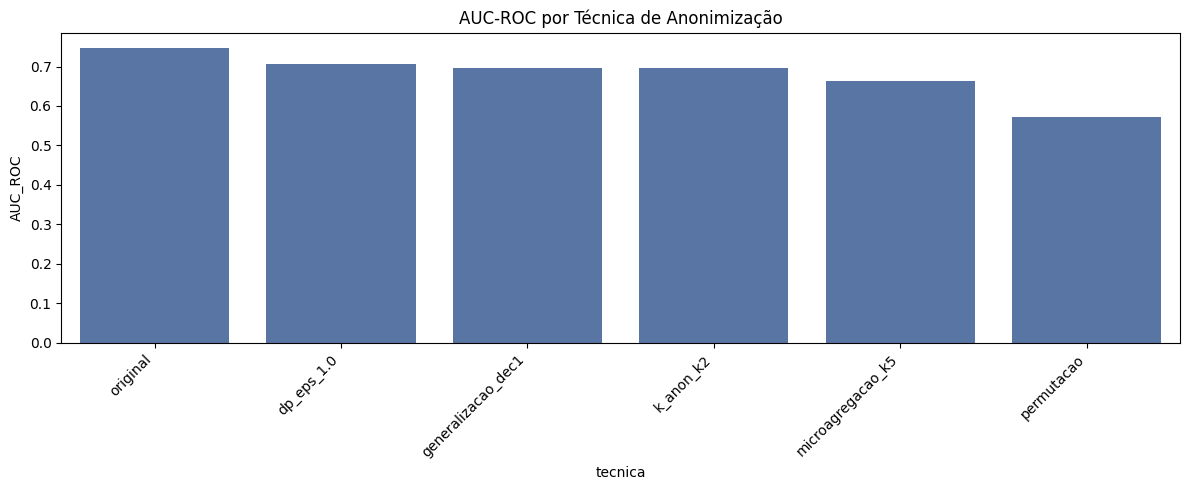

✅ Figura salva: /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final/auc_por_tecnica.png


In [5]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df_metricas, x="tecnica", y="AUC_ROC", color="#4C72B0")
plt.xticks(rotation=45, ha="right")
plt.title("AUC-ROC por Técnica de Anonimização")
plt.tight_layout()

out_png = os.path.join(OUT_COMP, "auc_por_tecnica.png")
plt.savefig(out_png, dpi=200)
plt.show()
print("✅ Figura salva:", out_png)


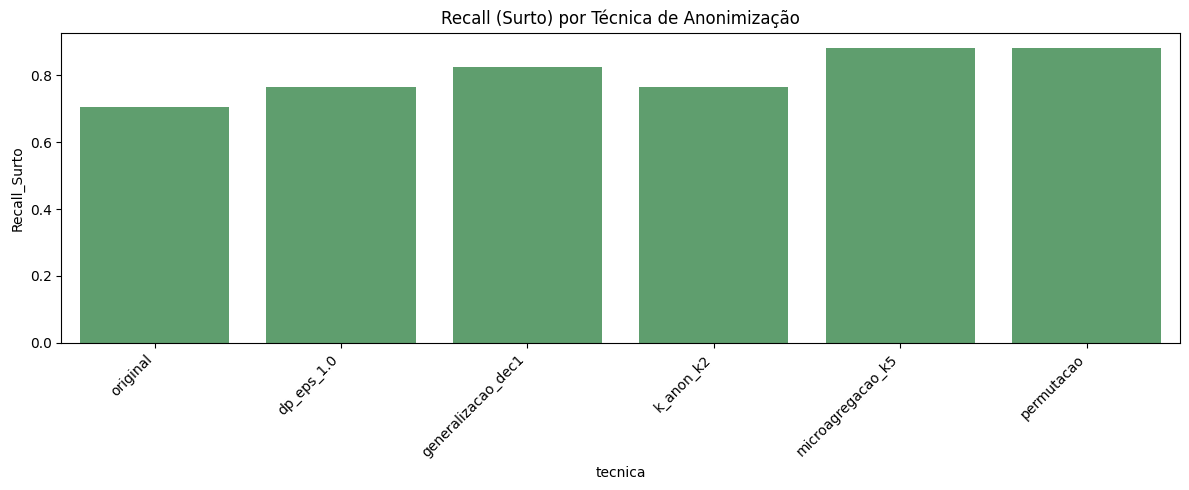

✅ Figura salva: /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final/recall_por_tecnica.png


In [6]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df_metricas, x="tecnica", y="Recall_Surto", color="#55A868")
plt.xticks(rotation=45, ha="right")
plt.title("Recall (Surto) por Técnica de Anonimização")
plt.tight_layout()

out_png = os.path.join(OUT_COMP, "recall_por_tecnica.png")
plt.savefig(out_png, dpi=200)
plt.show()
print("✅ Figura salva:", out_png)


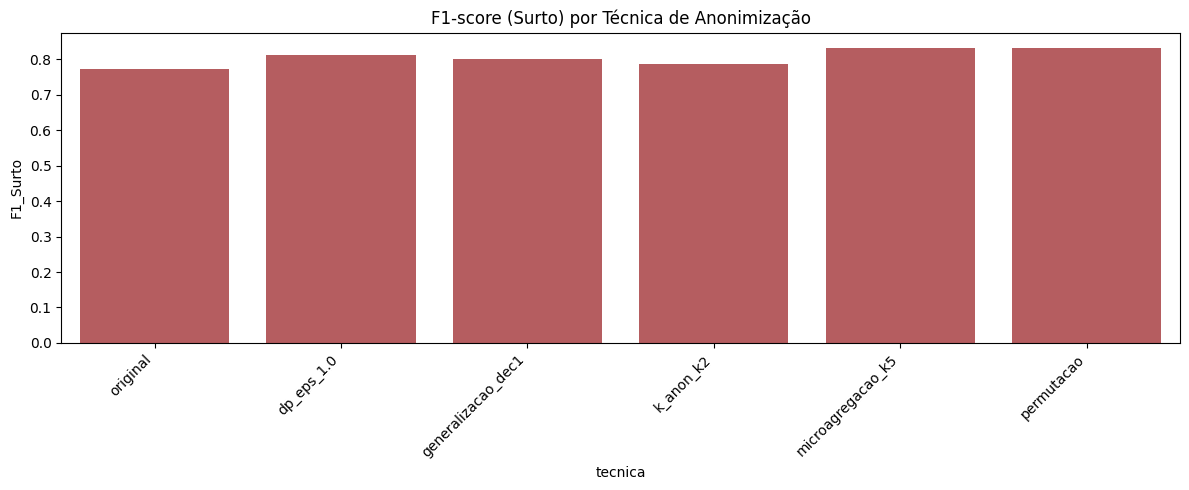

✅ Figura salva: /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final/f1_por_tecnica.png


In [7]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df_metricas, x="tecnica", y="F1_Surto", color="#C44E52")
plt.xticks(rotation=45, ha="right")
plt.title("F1-score (Surto) por Técnica de Anonimização")
plt.tight_layout()

out_png = os.path.join(OUT_COMP, "f1_por_tecnica.png")
plt.savefig(out_png, dpi=200)
plt.show()
print("✅ Figura salva:", out_png)


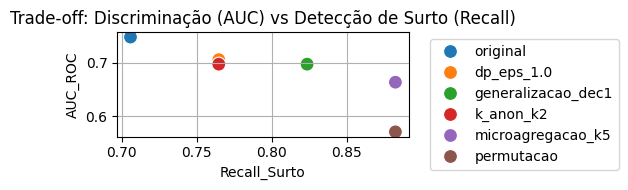

✅ Figura salva: /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final/tradeoff_auc_recall.png


In [19]:
plt.figure(figsize=(6,2))
sns.scatterplot(
    data=df_metricas,
    x="Recall_Surto",
    y="AUC_ROC",
    hue="tecnica",
    s=100
)
plt.title("Trade-off: Discriminação (AUC) vs Detecção de Surto (Recall)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()

out_png = os.path.join(OUT_COMP, "tradeoff_auc_recall.png")
plt.savefig(out_png, dpi=200)
plt.show()
print("✅ Figura salva:", out_png)


<Figure size 800x700 with 0 Axes>

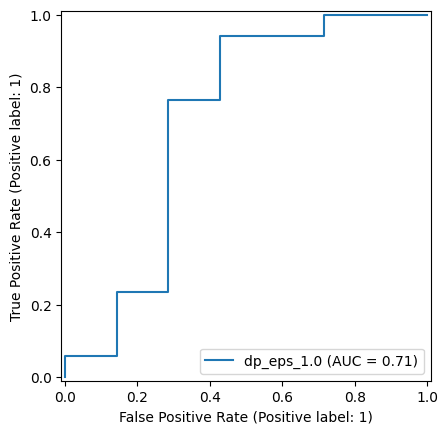

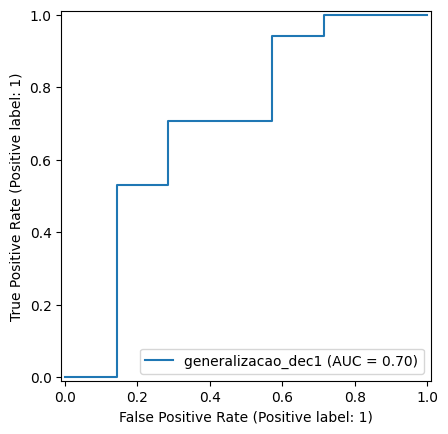

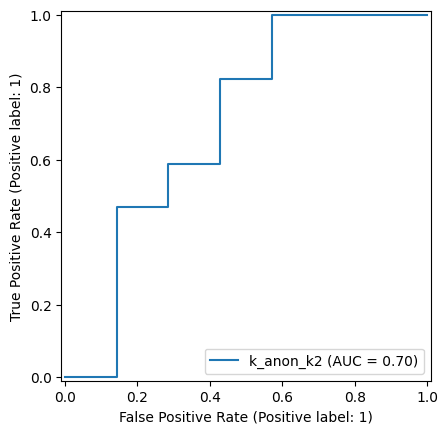

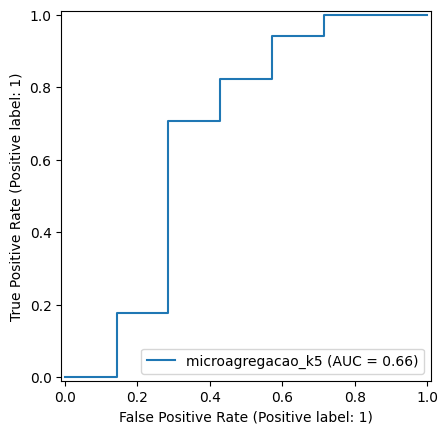

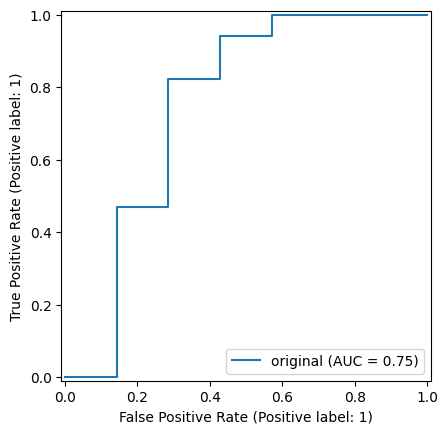

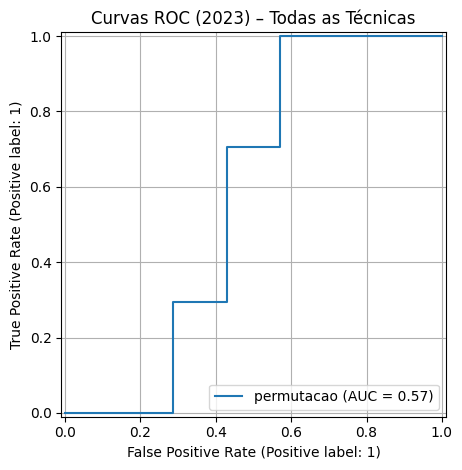

✅ Figura salva: /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final/roc_todas_tecnicas.png


In [9]:
from sklearn.metrics import RocCurveDisplay

def carregar_predicoes(base_dir, tecnica):
    path = os.path.join(base_dir, tecnica, "predicoes.csv")
    df = pd.read_csv(path)
    return df

plt.figure(figsize=(8, 7))

for tecnica in TECNICAS:
    dfp = carregar_predicoes(BASE_OUT, tecnica)
    RocCurveDisplay.from_predictions(
        dfp["y_true"].astype(int),
        dfp["y_proba"].astype(float),
        name=tecnica
    )

plt.title("Curvas ROC (2023) – Todas as Técnicas")
plt.grid(True)
plt.tight_layout()

out_png = os.path.join(OUT_COMP, "roc_todas_tecnicas.png")
plt.savefig(out_png, dpi=250)
plt.show()
print("✅ Figura salva:", out_png)


In [10]:
def comparar_duas(df_metricas, t1="original", t2="dp_eps_1.0"):
    a = df_metricas[df_metricas["tecnica"] == t1].iloc[0]
    b = df_metricas[df_metricas["tecnica"] == t2].iloc[0]

    cols = ["AUC_ROC","Recall_Surto","Precision_Surto","F1_Surto","Balanced_Accuracy"]
    linhas = []
    for c in cols:
        base = float(a[c])
        val  = float(b[c])
        impacto = ((val - base) / base * 100) if base != 0 else np.nan
        linhas.append([c, base, val, impacto])

    return pd.DataFrame(linhas, columns=["Metrica", t1, t2, "Impacto_%_(DP_vs_Original)"])

df_odp = comparar_duas(df_metricas, "original", "dp_eps_1.0")
display(df_odp.round(4))

out_csv = os.path.join(OUT_COMP, "comparacao_original_vs_dp.csv")
df_odp.to_csv(out_csv, index=False)
print("✅ Comparação salva:", out_csv)


,Metrica,original,dp_eps_1.0,Impacto_%_(DP_vs_Original)
0,AUC_ROC,0.7479,0.7059,-5.6180
1,Recall_Surto,0.7059,0.7647,8.3333
2,Precision_Surto,0.8571,0.8667,1.1111
3,F1_Surto,0.7742,0.8125,4.9479
4,Balanced_Accuracy,0.7101,0.7395,4.1420


✅ Comparação salva: /content/drive/MyDrive/Mestrado/Artigo - Dados/Comparacao_Final/comparacao_original_vs_dp.csv


In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste para seu caminho
BASE_OUT = "/content/drive/MyDrive/Mestrado/Artigo - Dados/Resultados_Modelos"
OUT_FIG  = "/content/drive/MyDrive/Mestrado/Artigo - Dados/Figuras_Artigo_Utilidade"
os.makedirs(OUT_FIG, exist_ok=True)

def listar_tecnicas(base_dir):
    tecnicas = []
    for nome in sorted(os.listdir(base_dir)):
        p = os.path.join(base_dir, nome)
        if os.path.isdir(p) and os.path.exists(os.path.join(p, "metricas.csv")):
            tecnicas.append(nome)
    return tecnicas

def carregar_metricas(base_dir, tecnicas):
    dfs = []
    for t in tecnicas:
        df = pd.read_csv(os.path.join(base_dir, t, "metricas.csv"))
        df["tecnica"] = t
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

TECNICAS = listar_tecnicas(BASE_OUT)
dfm = carregar_metricas(BASE_OUT, TECNICAS)

# Ordem desejada (melhor para narrativa do paper)
ordem = ["original", "dp_eps_1.0", "generalizacao_dec1", "k_anon_k2", "microagregacao_k5", "permutacao"]
ordem = [t for t in ordem if t in dfm["tecnica"].unique()]
dfm["tecnica"] = pd.Categorical(dfm["tecnica"], categories=ordem, ordered=True)
dfm = dfm.sort_values("tecnica")

# --- Figura U1: Trade-off AUC vs Recall (paper-like)
plt.figure(figsize=(7.2, 4.8))
ax = sns.scatterplot(
    data=dfm,
    x="AUC_ROC", y="Recall_Surto",
    hue="tecnica", s=120
)
for _, r in dfm.iterrows():
    ax.text(r["AUC_ROC"] + 0.002, r["Recall_Surto"] + 0.002, str(r["tecnica"]), fontsize=9)

plt.title("Trade-off: AUC-ROC vs Recall (Surto) em 2023")
plt.xlabel("AUC-ROC")
plt.ylabel("Recall (classe Surto)")
plt.grid(True, alpha=0.3)
plt.legend([], [], frameon=False)  # remove legenda (já tem labels no gráfico)
plt.tight_layout()
out = os.path.join(OUT_FIG, "U1_tradeoff_auc_recall.png")
plt.savefig(out, dpi=300)
plt.close()
print("✅ Salvo:", out)

# --- Figura U2: AUC por técnica
plt.figure(figsize=(7.2, 4.0))
sns.barplot(data=dfm, x="tecnica", y="AUC_ROC", color="#4C72B0")
plt.title("AUC-ROC por técnica (teste em 2023)")
plt.xlabel("Técnica")
plt.ylabel("AUC-ROC")
plt.xticks(rotation=25, ha="right")
plt.ylim(0.45, 0.80)  # melhora leitura (ajuste se necessário)
plt.grid(axis="y", alpha=0.25)
plt.tight_layout()
out = os.path.join(OUT_FIG, "U2_auc_por_tecnica.png")
plt.savefig(out, dpi=300)
plt.close()
print("✅ Salvo:", out)

# --- Figura U4 (opcional): Heatmap compacto de métricas
metric_cols = ["AUC_ROC", "Recall_Surto", "Precision_Surto", "F1_Surto", "Balanced_Accuracy"]
df_heat = dfm[["tecnica"] + metric_cols].set_index("tecnica").copy()

plt.figure(figsize=(7.2, 3.2))
sns.heatmap(df_heat, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
plt.title("Métricas por técnica (teste 2023)")
plt.xlabel("Métrica")
plt.ylabel("Técnica")
plt.tight_layout()
out = os.path.join(OUT_FIG, "U4_heatmap_metricas.png")
plt.savefig(out, dpi=300)
plt.close()
print("✅ Salvo:", out)


✅ Salvo: /content/drive/MyDrive/Mestrado/Artigo - Dados/Figuras_Artigo_Utilidade/U1_tradeoff_auc_recall.png
✅ Salvo: /content/drive/MyDrive/Mestrado/Artigo - Dados/Figuras_Artigo_Utilidade/U2_auc_por_tecnica.png
✅ Salvo: /content/drive/MyDrive/Mestrado/Artigo - Dados/Figuras_Artigo_Utilidade/U4_heatmap_metricas.png


NameError: name 'df_original' is not defined

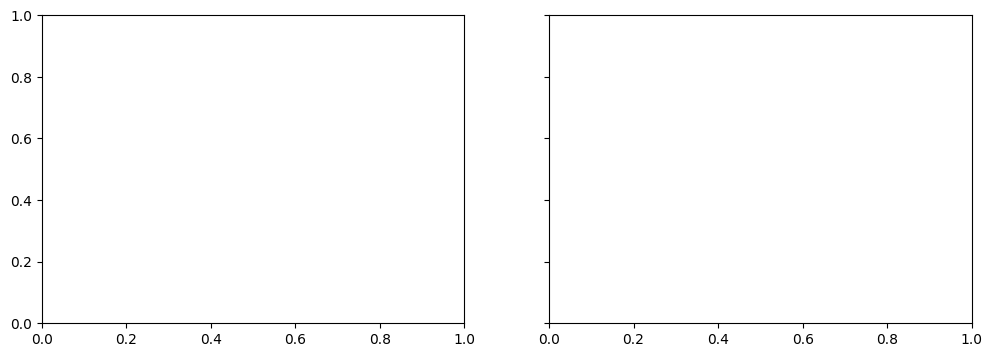

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Original
axes[0].scatter(
    df_original["longitude"],
    df_original["latitude"],
    s=6, alpha=0.6
)
axes[0].set_title("Coordenadas Originais")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].grid(True, alpha=0.3)

# Anonimizado
axes[1].scatter(
    df_anon["longitude"],
    df_anon["latitude"],
    s=6, alpha=0.6
)
axes[1].set_title("Coordenadas Anonimizadas")
axes[1].set_xlabel("Longitude")
axes[1].grid(True, alpha=0.3)

plt.suptitle("Distribuição Espacial – Original vs Anonimizado")
plt.tight_layout()
plt.show()
